## Library Imports

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tabulate import tabulate
from sklearn.utils import shuffle
from sklearn.metrics import r2_score
from mpl_toolkits import mplot3d
import seaborn as sns

## Data Load / Import

In [44]:
cities = ['boston', 'london', 'merthyr', 'nottingham', 'scarhill', 'southampton', 'stevenage']
 
wavelengths = ['0.91595','0.449425','1.8025','2.695','3.6025','5.85']

df = pd.DataFrame()

for city in cities:
    for wavelength in wavelengths:
        df1 = pd.read_csv(f"../Data/trainingDataset/{city}{wavelength}.csv")
        df = pd.concat([df, df1])

df = shuffle(df)

### Find and Remove N/A's

In [45]:
print(df.isna().sum())
df = df.dropna()
print(df.isna().sum())

Frequency                  0
Power Loss               752
Distance                 752
Height Difference        752
Peak Avg. Height Diff    752
Peak Avg. Dist.          752
Max Peak                 752
Peak Count               752
dtype: int64
Frequency                0
Power Loss               0
Distance                 0
Height Difference        0
Peak Avg. Height Diff    0
Peak Avg. Dist.          0
Max Peak                 0
Peak Count               0
dtype: int64


### Size of Dataset

In [46]:
df.shape

(8243520, 8)

### Remove Uneeded Features

In [47]:
df.pop('Peak Avg. Height Diff')
df.pop('Peak Avg. Dist.')
df.pop('Max Peak')
df.pop('Peak Count')

print(tabulate(df.head(5), 'keys'))

          Frequency    Power Loss    Distance    Height Difference
------  -----------  ------------  ----------  -------------------
240466       2.695         132.95     3.23174                  -37
145682       3.6025        162.59    15.5664                     8
130916       2.695         168.27    16.9479                  -123
233343       2.695         168.02    30.2578                   -73
129023       5.85          136.79     5.598                     -7


### Describe Dataset

In [48]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Frequency,8243520.0,3.588651,1.784452,0.449425,2.695000,3.602500,5.850000,5.850000
Power Loss,8243520.0,155.691803,19.466673,59.470000,143.680000,159.050000,170.410000,212.040000
Distance,8243520.0,12.612030,8.311019,0.030879,6.117899,11.177778,17.919192,83.656356
Height Difference,8243520.0,-97.367859,113.732718,-644.000000,-156.000000,-69.000000,1.000000,29.000000


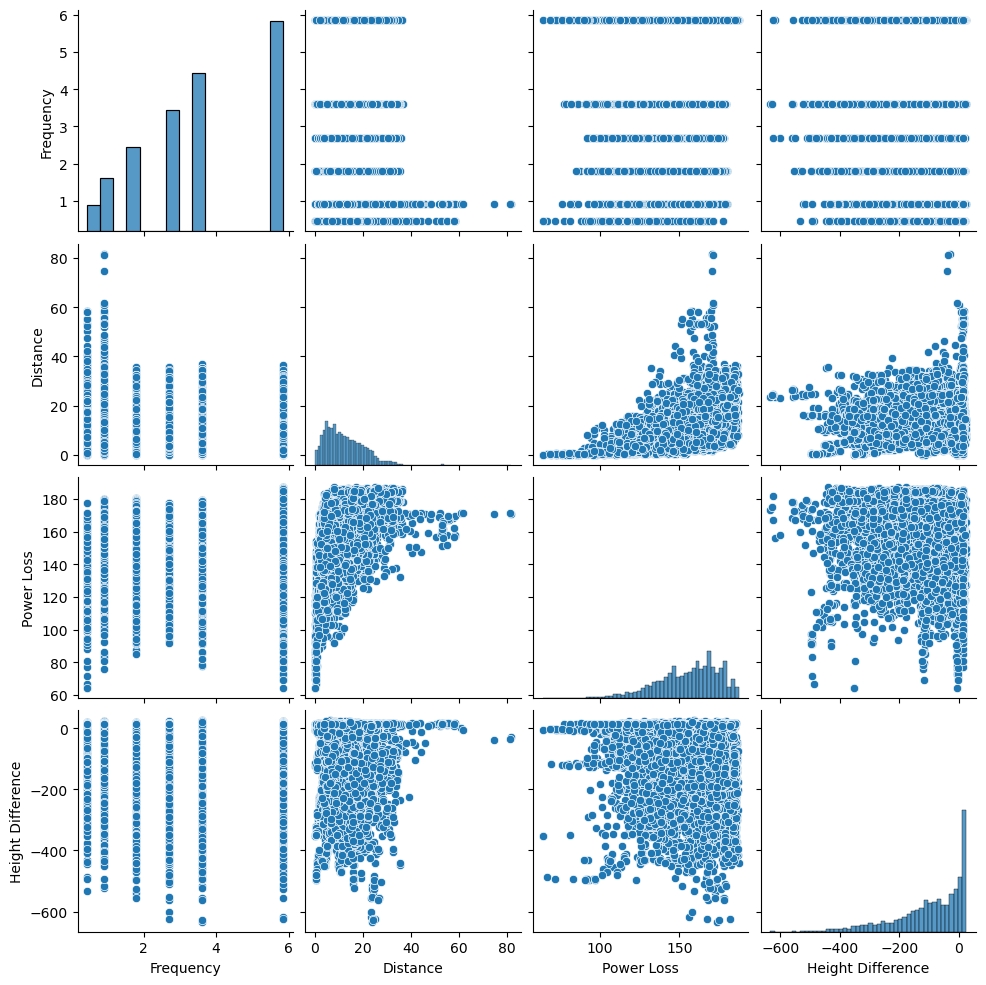

In [49]:
df = df[~df.index.duplicated()]
df[df.index.duplicated()]
df = df.head(10000)
sns.pairplot(df[['Frequency','Distance', 'Power Loss', 'Height Difference']])
plt.show()

## Convert to Numpy Array and Extract Columns

In [50]:
frequency = df["Frequency"].head(10000)
pLoss = df["Power Loss"].head(10000).to_numpy()
distance = df["Distance"].head(10000)
hDiff = df["Height Difference"].head(10000)

## Begin Plotting

Text(0.5, 1.0, 'Height Difference vs Power Loss')

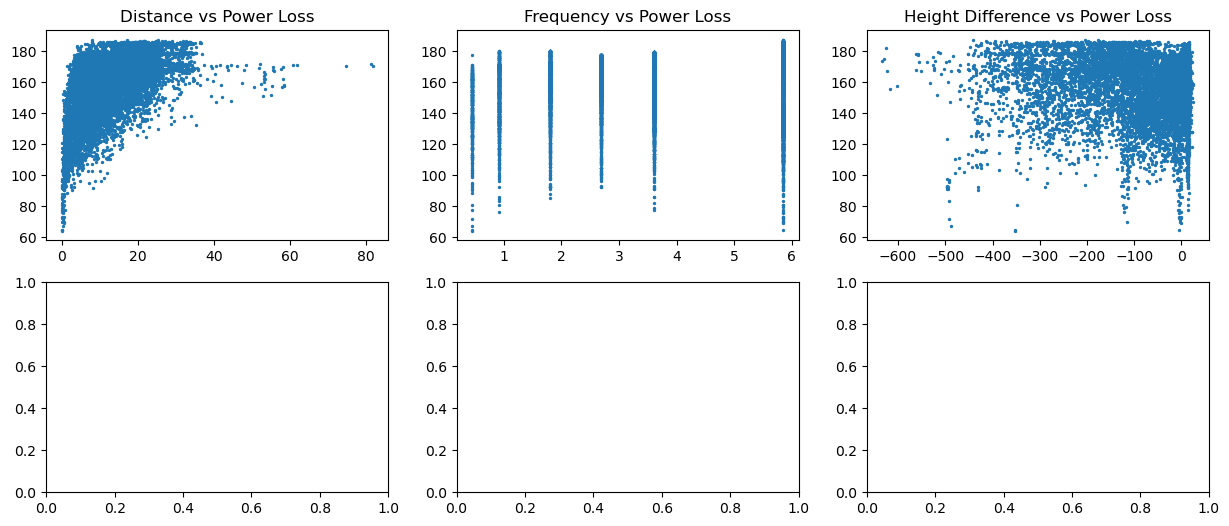

In [51]:
fig, axs = plt.subplots(2,3)
plt.rcParams['figure.figsize'] = [15, 10]
axs[0, 0].scatter(distance, pLoss, 2)
axs[0, 0].set_title("Distance vs Power Loss")
axs[0, 1].scatter(frequency, pLoss, 2)
axs[0, 1].set_title("Frequency vs Power Loss")
axs[0, 2].scatter(hDiff, pLoss, 2)
axs[0, 2].set_title("Height Difference vs Power Loss")

# Plot Distance

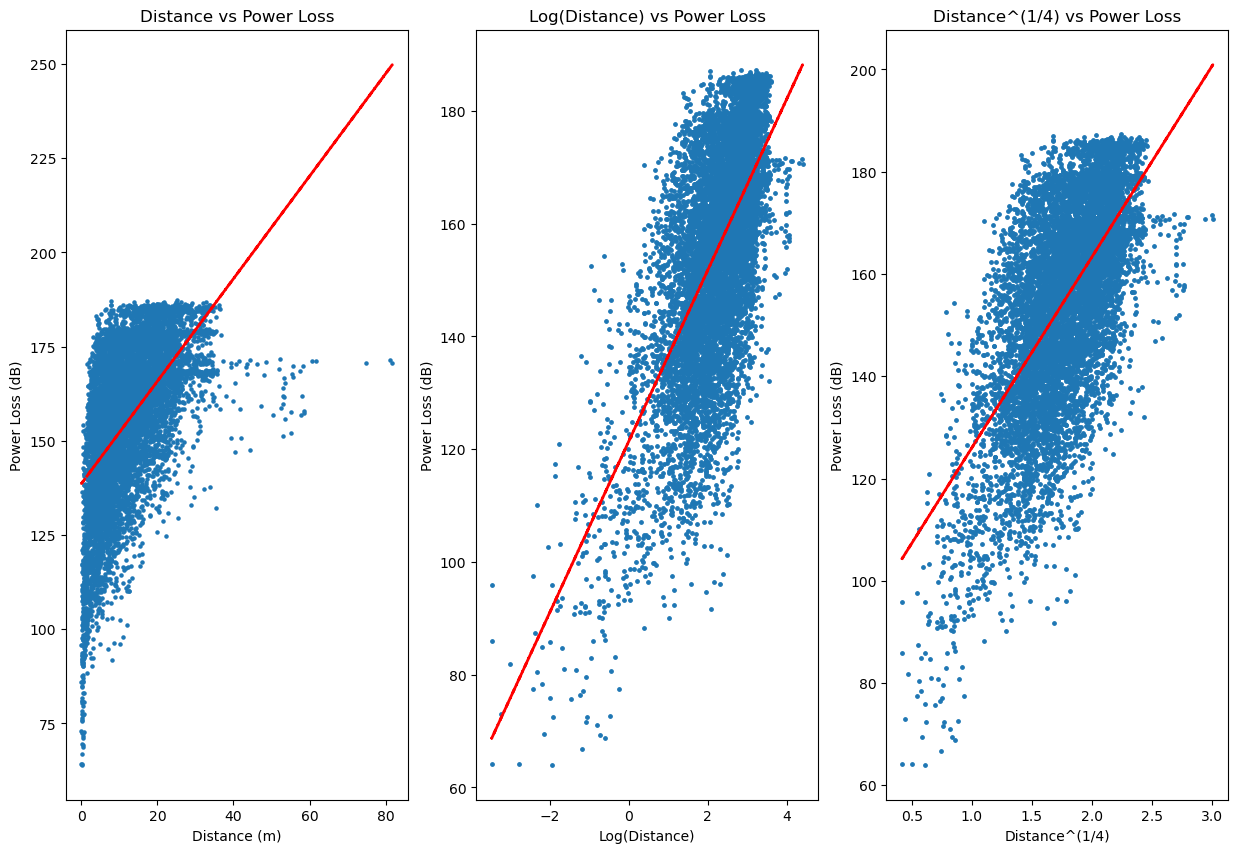

In [52]:
fig, axs = plt.subplots(1,3)
plt.rcParams['figure.figsize'] = [20, 6]
axs[0].scatter(distance, pLoss, 5)
axs[0].set_title('Distance vs Power Loss')
axs[0].set(xlabel='Distance (m)', ylabel='Power Loss (dB)')
x = distance
z = np.polyfit(x, pLoss, 1)
p = np.poly1d(z)
axs[0].plot(x, p(x), color="red", linewidth=2, linestyle="--")

axs[1].scatter(np.log(distance), pLoss, 6)
axs[1].set_title('Log(Distance) vs Power Loss')
axs[1].set(xlabel='Log(Distance)', ylabel='Power Loss (dB)')
x = np.log(distance)
z = np.polyfit(x, pLoss, 1)
p = np.poly1d(z)
axs[1].plot(x, p(x), color="red", linewidth=2, linestyle="--")

axs[2].scatter(distance**(1/4), pLoss, 6)
axs[2].set_title('Distance^(1/4) vs Power Loss')
axs[2].set(xlabel='Distance^(1/4)', ylabel='Power Loss (dB)')
x = distance**(1/4)
z = np.polyfit(x, pLoss, 1)
p = np.poly1d(z)
axs[2].plot(x, p(x), color="red", linewidth=2, linestyle="--")


## Plot Frequency

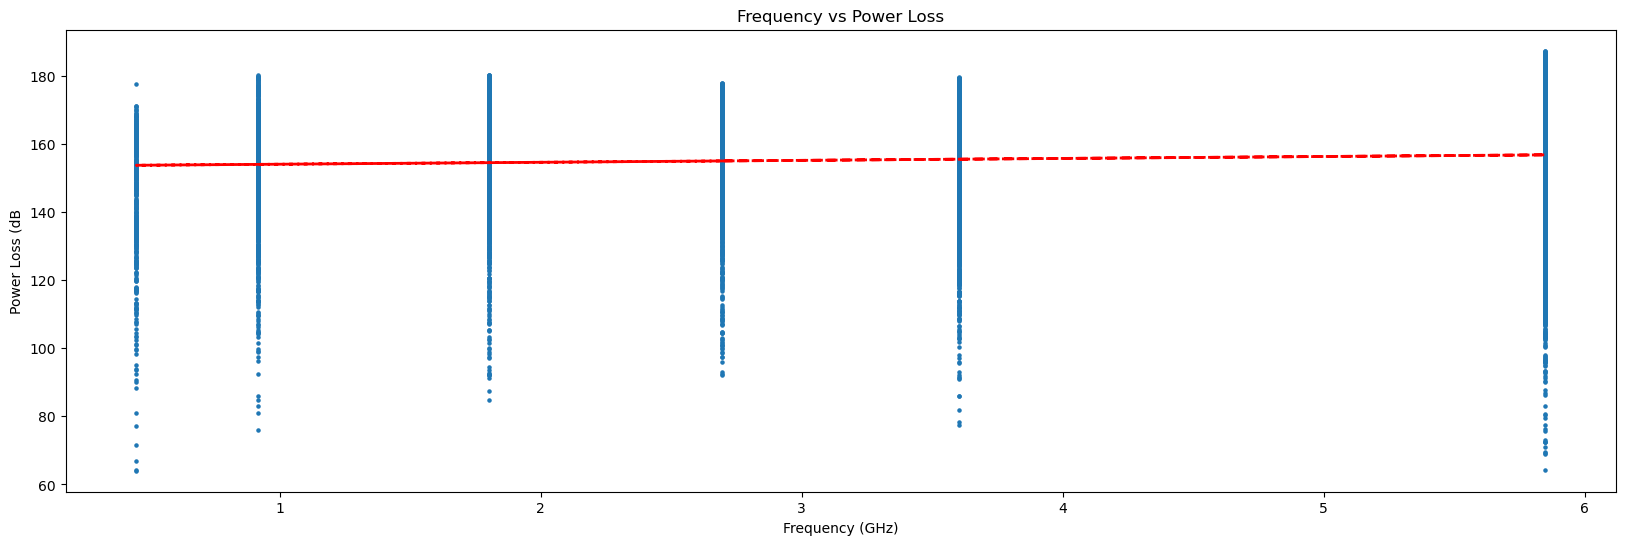

In [53]:
ax = plt.subplot()
plt.rcParams['figure.figsize'] = [8, 5]
plt.scatter(frequency, pLoss, 5)
plt.title('Frequency vs Power Loss')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Power Loss (dB')

x = frequency
z = np.polyfit(x, pLoss, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color="red", linewidth=2, linestyle="--")

## Height Difference

/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


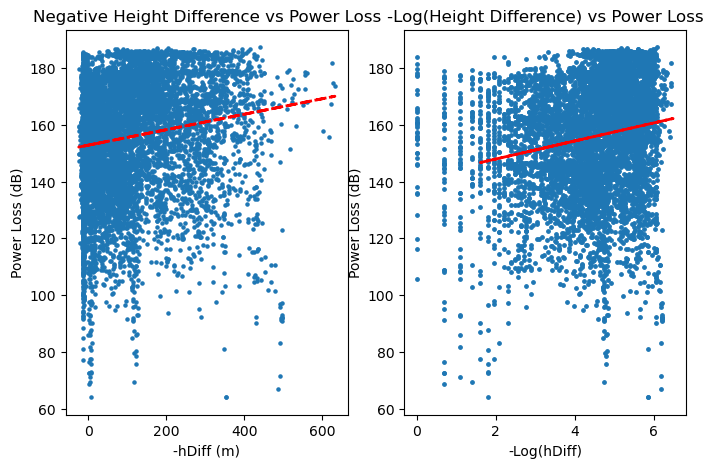

In [54]:
fig, axs = plt.subplots(1,2)
plt.rcParams['figure.figsize'] = [15, 6]
axs[0].scatter(-hDiff, pLoss, 5)
axs[0].set_title('Negative Height Difference vs Power Loss')
axs[0].set(xlabel='-hDiff (m)', ylabel='Power Loss (dB)')
x = -hDiff
z = np.polyfit(x, pLoss, 1)
p = np.poly1d(z)
axs[0].plot(x, p(x), color="red", linewidth=2, linestyle="--")

axs[1].scatter(np.log(-hDiff), pLoss, 6)
axs[1].set_title('-Log(Height Difference) vs Power Loss')
axs[1].set(xlabel='-Log(hDiff)', ylabel='Power Loss (dB)')
x = np.log(-hDiff + 30)
z = np.polyfit(x, pLoss, 1)
p = np.poly1d(z)
axs[1].plot(x, p(x), color="red", linewidth=2, linestyle="--")
